# `simplegrad`

A simple deep learning framework on top of numpy offering a PyTorch-like API, inspired by autograd.

## Tensors computations with automatic differentiation

In [1]:
import simplegrad as sg

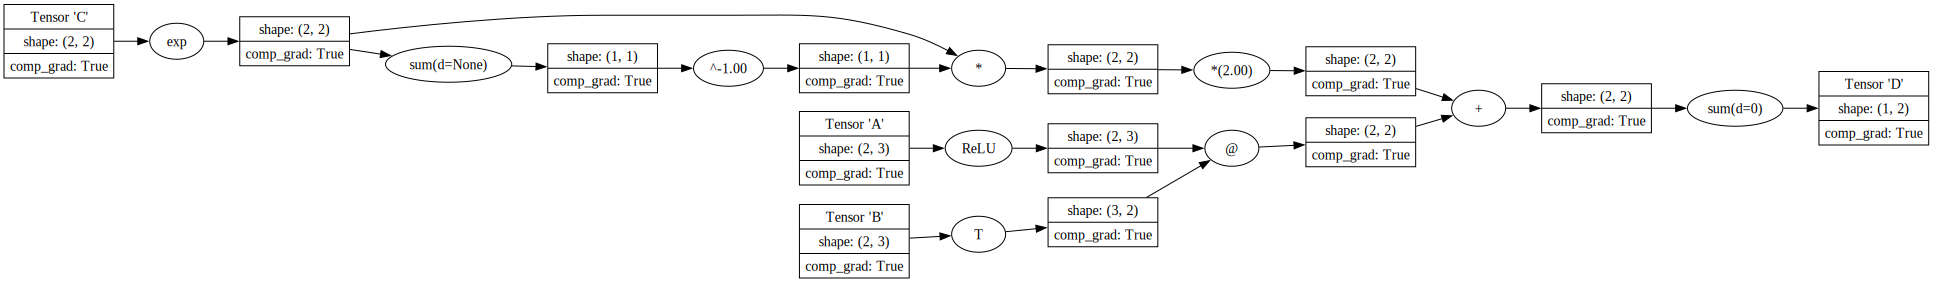

In [2]:
a = sg.Tensor([[1, 2, 0], [1, 1, 3]], label="A")
b = sg.Tensor([[1, 1, 0], [1, 1, 0]], label="B")
c = sg.Tensor([[1, 2], [2, 3]], label="C")
d = sg.sum(2 * sg.func.Softmax(c) + sg.func.ReLU(a) @ b.T, dim=0); d.label = "D"
d.display_graph(path="images/graph")

In [3]:
d.zero_grad()
d.backward()
print("D grad:\n", d.grad)
print("\nA grad:\n", a.grad)
print("\nB grad:\n", b.grad)
print("\nC grad:\n", c.grad)

D grad:
 [[1. 1.]]

A grad:
 [[2. 2. 0.]
 [2. 2. 0.]]

B grad:
 [[2. 3. 3.]
 [2. 3. 3.]]

C grad:
 [[2.42683940e-09 4.85367879e-09]
 [4.85367879e-09 7.28051819e-09]]


## Model Creation

In [4]:
class MicroModel():
    def __init__(self):
        self.fc1 = sg.mod.Linear(3, 2, use_bias=True)
        self.act1 = sg.func.ReLU()
        self.fc2 = sg.mod.Linear(2, 1, use_bias=True)
        self.act2 = sg.func.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        return x

model = MicroModel()
# model.display_graph()

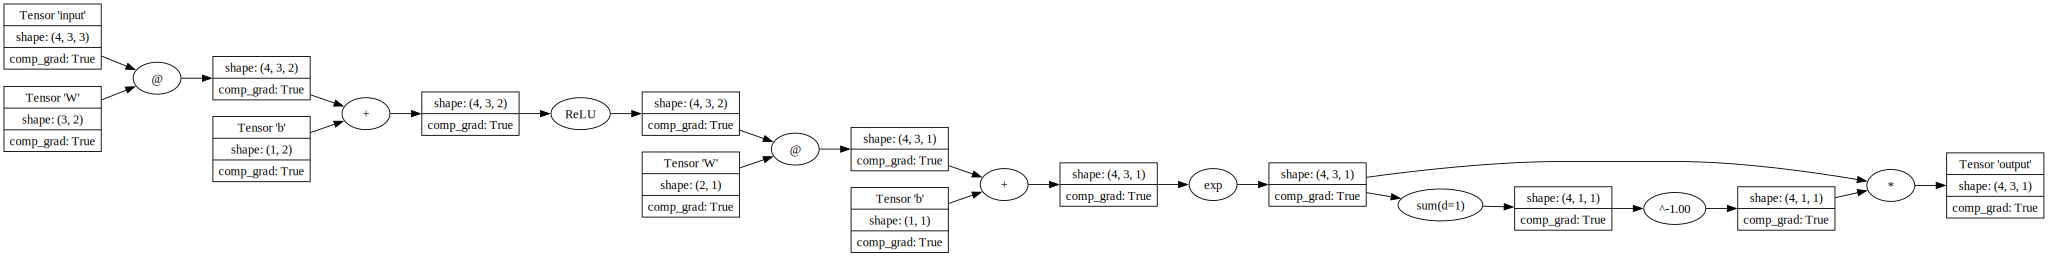

In [5]:
input = sg.random(shape=(4, 3, 3), label="input")

output = model.forward(input)
output.label = "output"
output.display_graph()

In [6]:
output.zero_grad()
output.backward()
print("Output grad:\n", output.grad)
print("\nFC1 Weights grad:\n", model.fc1.weight.grad)
print("\nFC1 Bias grad:\n", model.fc1.bias.grad)
print("\nFC2 Weights grad:\n", model.fc2.weight.grad)
print("\nFC2 Bias grad:\n", model.fc2.bias.grad)

Output grad:
 [[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]]

FC1 Weights grad:
 [[ 7.39607686e-12 -4.87460412e-12]
 [-1.78513132e-13 -3.99396617e-12]
 [-2.82450351e-12 -2.61347847e-12]]

FC1 Bias grad:
 [[ 7.75285425e-12 -9.51930831e-13]]

FC2 Weights grad:
 [[4.57922155e-13]
 [1.05420193e-12]]

FC2 Bias grad:
 [[3.63123719e-10]]
